In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
import matplotlib.pyplot as plt 

(60, 60, 3)

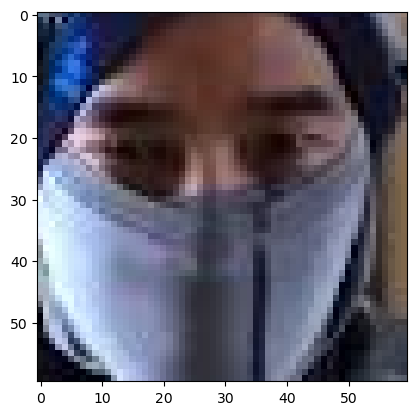

In [4]:
img=plt.imread('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/1020.png')
plt.imshow(img)
img.shape

In [5]:
IMAGE_WIDTH=50
IMAGE_HEIGHT=50
IMAGE_SIZE=(50,50)
BATCH_SIZE=16
train_path='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_path='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_path='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

# Loading Images into Dataset

In [6]:
train_ds=keras.utils.image_dataset_from_directory(train_path,
                                                 image_size=IMAGE_SIZE,
                                                 batch_size=BATCH_SIZE,
                                                 )
val_ds=keras.utils.image_dataset_from_directory(val_path,
                                                 image_size=IMAGE_SIZE,
                                                 batch_size=BATCH_SIZE,
                                                 )
test_ds=keras.utils.image_dataset_from_directory(test_path,
                                                 image_size=IMAGE_SIZE,
                                                 batch_size=BATCH_SIZE,
                                                 )

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


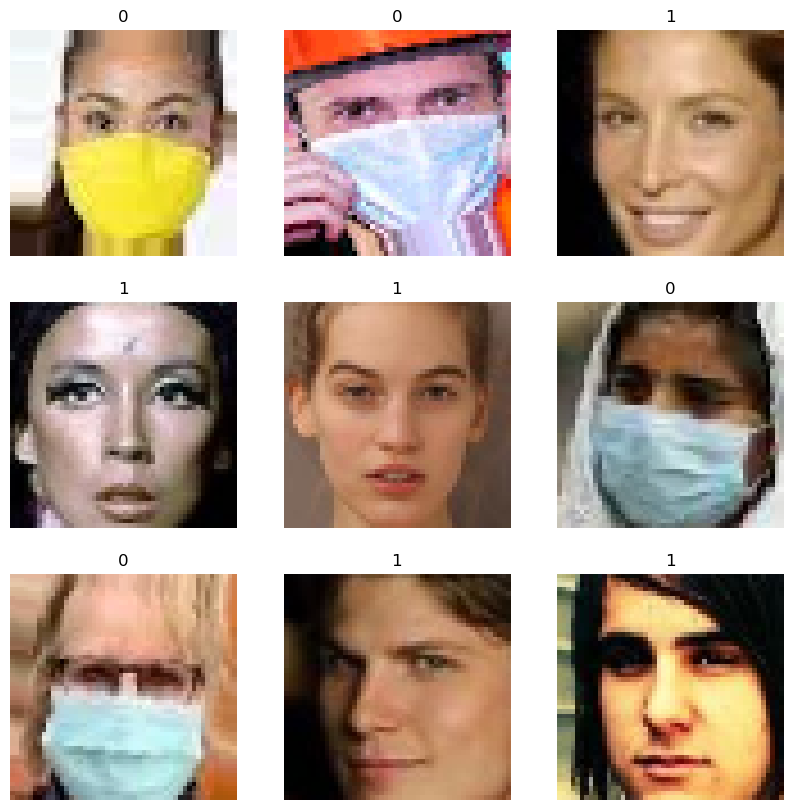

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [8]:
class_names = train_ds.class_names
print(class_names)

['WithMask', 'WithoutMask']


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 50, 50, 3)
(16,)


# creating augmentaion layers

In [12]:
from keras import layers

In [38]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_HEIGHT, IMAGE_WIDTH),
  layers.Rescaling(1./255)
])

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

# callback

In [16]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(patience=2,
                        monitor='val_loss')

# creating model with transfer learning

In [27]:
import keras.applications
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D

In [42]:
vgg=keras.applications.vgg16.VGG16(include_top=False,
                             weights='imagenet',
                             input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3))
vgg.trainable=False

model=Sequential()

# model.add(resize_and_rescale)
model.add(data_augmentation)
model.add(vgg)

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')

model.fit(train_ds,
                 validation_data=val_ds,
                 callbacks=[earlyStop],
                 epochs=15)

Epoch 1/15
625/625 [==============================] - 7s 9ms/step - loss: 0.9532 - accuracy: 0.9106 - val_loss: 0.0740 - val_accuracy: 0.9775
Epoch 2/15
625/625 [==============================] - 5s 9ms/step - loss: 0.2400 - accuracy: 0.9392 - val_loss: 0.1066 - val_accuracy: 0.9700
Epoch 3/15
625/625 [==============================] - 6s 9ms/step - loss: 0.1522 - accuracy: 0.9492 - val_loss: 0.0602 - val_accuracy: 0.9775
Epoch 4/15
625/625 [==============================] - 5s 9ms/step - loss: 0.1184 - accuracy: 0.9567 - val_loss: 0.0612 - val_accuracy: 0.9775
Epoch 5/15
625/625 [==============================] - 5s 9ms/step - loss: 0.1080 - accuracy: 0.9619 - val_loss: 0.0728 - val_accuracy: 0.9750


# custom model from scratch

In [ ]:
model_aug = keras.models.Sequential()
model_aug.add(layers.Rescaling(1./255))
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(50, 50, 3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
#model_aug.add(layers.Dropout(0.5))

model_aug.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D((2, 2)))
#model_aug.add(layers.Dropout(0.2))

model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Dropout(0.2))

model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D((2, 2)))

# model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))

model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512, activation='relu'))
model_aug.add(layers.Dropout(0.3))
model_aug.add(layers.Dense(128, activation='relu'))
model_aug.add(layers.Dropout(0.2))
model_aug.add(layers.Dense(1, activation='sigmoid'))

model_aug.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_aug.fit(train_ds,
                 validation_data=val_ds,
                 callbacks=[earlyStop],
                 epochs=2)

# Inference

1/1 [==============================] - 0s 19ms/step
Mask


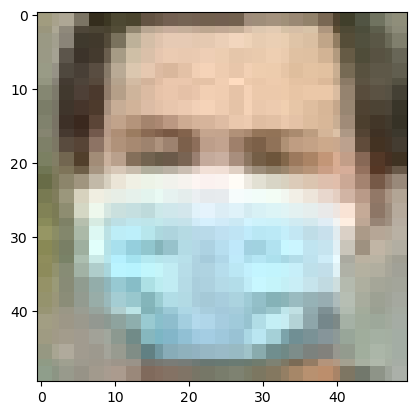

In [47]:
img = keras.utils.load_img(
    "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1361.png", target_size=IMAGE_SIZE
)
img_array = keras.utils.img_to_array(img)
# img_array=img_array/255.
plt.imshow(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = model.predict(img_array)
score = float(predictions[0])
if(score>0.5):
    print('No Mask')
else:
    print('Mask')
# print(f"This image is {100 * (1 - score):.2f}% withMask and {100 * score:.2f}% withoutMask.")

In [ ]:
img = keras.utils.load_img(
    "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1375.png", target_size=IMAGE_SIZE
)
img_array = keras.utils.img_to_array(img)
# img_array=img_array/255.
plt.imshow(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = model.predict(img_array)
score = float(predictions[0])
if(score>0.5):
    print('No Mask')
else:
    print('Mask')
# print(f"This image is {100 * (1 - score):.2f}% withMask and {100 * score:.2f}% withoutMask.")

In [49]:
model.save('/kaggle/working/model.tf')

In [50]:
model.save('/kaggle/working/model.h5')

In [51]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))
download_file('/kaggle/working', 'out')

/kaggle/working/out.zip